# DMG2 Assignment : Problem 5

_k-Nearest Neighbours Classifier, Parzen Window Classifier_

In [142]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KernelDensity

sns.set_style('whitegrid')

In [143]:
DATA_DIR = 'D:\\ISB\\Term3\\DMG2\\assignment\\datasets\\mnist'

In [144]:
train = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
test = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
for num in range(10):
    # Consolidating training data
    temp_train = pd.read_csv(os.path.join(DATA_DIR,'train{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_train['label'] = num
    train = train.append(temp_train,ignore_index=True)
    # Consolidating test data
    temp_test = pd.read_csv(os.path.join(DATA_DIR,'test{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_test['label'] = num
    test = test.append(temp_test,ignore_index=True)

In [145]:
train.shape

(36470, 785)

In [146]:
test.shape

(24190, 785)

In [147]:
train[train.isnull().any(axis=1)].groupby(by='label')['label'].value_counts()

label  label
4      4         46
5      5        299
6      6          1
8      8         42
Name: label, dtype: int64

In [148]:
test[test.isnull().any(axis=1)].groupby(by='label')['label'].value_counts()

label  label
4      4         35
5      5        203
6      6          4
8      8         30
Name: label, dtype: int64

**There are missing values in both the training and test data. Shown above is the count of rows with missing values, and the associated labels.**

In [149]:
train.groupby(by='label')['label'].value_counts()

label  label
0      0        3567
1      1        4034
2      2        3582
3      3        3677
4      4        3567
5      5        3567
6      6        3567
7      7        3763
8      8        3567
9      9        3579
Name: label, dtype: int64

In [150]:
test.groupby(by='label')['label'].value_counts()

label  label
0      0        2356
1      1        2708
2      2        2376
3      3        2454
4      4        2356
5      5        2356
6      6        2356
7      7        2502
8      8        2356
9      9        2370
Name: label, dtype: int64

Considering the number of complete data for each label, we can safely remove the rows with missing values for our analysis.

In [151]:
train = train.dropna()
test = test.dropna()

In [152]:
train.isnull().values.any()

False

In [153]:
test.isnull().values.any()

False

There are no missing values in the training and test data now

In [154]:
X_train = train.iloc[:,:784]
Y_train = train.iloc[:,784]

X_test = test.iloc[:,:784]
Y_test = test.iloc[:,784]

In [155]:
# Standardizing feature values
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Applying PCA

In [156]:
# Applying PCA
pc = PCA(n_components=9).fit_transform(X_train)
d1_train = pd.DataFrame(data=pc,columns=['pc{0}'.format(i) for i in range(1,10)])
d1_train['label'] = Y_train.values
d1_train.head(5)

pc = PCA(n_components=9).fit_transform(X_test)
d1_test = pd.DataFrame(data=pc,columns=['pc{0}'.format(i) for i in range(1,10)])
d1_test['label'] = Y_test.values
d1_test.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,label
0,1.751817,-6.389522,-2.021031,-2.693875,-6.433135,1.021696,-0.547938,5.236542,3.607186,0
1,5.884332,-7.690700,-2.390948,0.261038,-4.926525,-0.382478,0.300904,6.488038,3.033002,0
2,16.381100,5.663295,-1.865826,-3.368583,4.359764,-3.092983,-5.643665,-3.864024,2.539338,0
3,12.814324,-7.638504,-4.434648,-7.658662,-0.550861,-1.784557,-0.080891,1.765810,0.351385,0
4,11.123284,7.252486,5.007086,-0.333215,15.017602,-0.074669,-0.997392,-2.375737,-0.028071,0


## Applying Fisher LDA

In [157]:
fisher = LinearDiscriminantAnalysis(n_components=9).fit_transform(X_train,Y_train.astype('int'))
d2_train = pd.DataFrame(data=fisher,columns=['f{0}'.format(i) for i in range(1,10)])
d2_train['label'] = Y_train.values
d2_train.head(5)

fisher = LinearDiscriminantAnalysis(n_components=9).fit_transform(X_test,Y_test.astype('int'))
d2_test = pd.DataFrame(data=fisher,columns=['f{0}'.format(i) for i in range(1,10)])
d2_test['label'] = Y_test.values
d2_test.head(5)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,f1,f2,f3,f4,f5,f6,f7,f8,f9,label
0,-2.833687,-1.079133,-0.845838,-0.764987,-0.484096,0.313129,-0.955681,-0.997196,1.076134,0
1,-3.849851,-3.435085,-1.935596,0.478846,-2.420500,-0.475621,0.572627,-0.989022,0.779083,0
2,-3.350865,-4.500847,-3.900589,-1.086583,-2.654538,-1.739049,-1.565408,-0.213139,-0.024020,0
3,-3.283216,-2.503597,-3.138834,-0.103059,-1.582149,-0.295842,1.330582,-3.239352,1.473339,0
4,-2.231976,-1.552025,-3.889057,-0.017441,-0.577388,-2.299944,-0.684894,0.945457,0.404140,0


## k-Nearest Neighbors Classification

In [158]:
d1_train_X = d1_train.iloc[:,:9]
d1_train_Y = d1_train.iloc[:,9].astype('int')

d1_test_X = d1_test.iloc[:,:9]
d1_test_Y = d1_test.iloc[:,9].astype('int')

d2_train_X = d2_train.iloc[:,:9]
d2_train_Y = d2_train.iloc[:,9].astype('int')

d2_test_X = d2_test.iloc[:,:9]
d2_test_Y = d2_test.iloc[:,9].astype('int')

In [57]:
d1_knn = pd.DataFrame(columns=['k','acc_type','acc'])
d2_knn = pd.DataFrame(columns=['k','acc_type','acc'])

In [58]:
for k in range(1,18,2):
    knn1 = KNeighborsClassifier(n_neighbors=k).fit(d1_train_X,d1_train_Y)
    knn2 = KNeighborsClassifier(n_neighbors=k).fit(d2_train_X,d2_train_Y)
    d1_knn = d1_knn.append({'k' : k, 'acc_type' : 'training', 'acc' : np.round(knn1.score(d1_train_X,d1_train_Y),4)},ignore_index=True)
    d1_knn = d1_knn.append({'k' : k, 'acc_type' : 'test', 'acc' : np.round(knn1.score(d1_test_X,d1_test_Y),4)},ignore_index=True)
    d2_knn = d2_knn.append({'k' : k, 'acc_type' : 'training', 'acc' : np.round(knn2.score(d2_train_X,d2_train_Y),4)},ignore_index=True)
    d2_knn = d2_knn.append({'k' : k, 'acc_type' : 'test', 'acc' : np.round(knn2.score(d2_test_X,d2_test_Y),4)},ignore_index=True)


In [59]:
d1_knn.head()

,k,acc_type,acc
0,1,training,1.0000
1,1,test,0.7043
2,3,training,0.9332
3,3,test,0.7233
4,5,training,0.9201


### Plotting training and test accuracy for kNN Classification

**D1 Dataset**

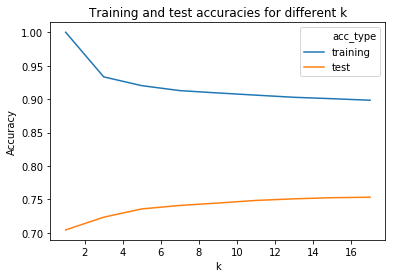

In [60]:
sns.lineplot(x='k',y='acc',hue='acc_type',data=d1_knn,ci=0,)
plt.title('Training and test accuracies for different k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show();

**D2 Dataset**

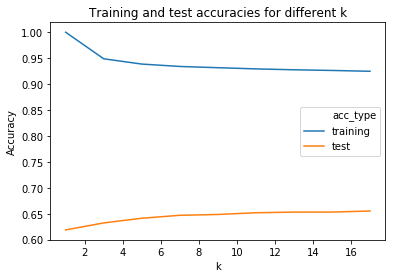

In [61]:
sns.lineplot(x='k',y='acc',hue='acc_type',data=d2_knn,ci=0,)
plt.title('Training and test accuracies for different k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show();

**The optimal k for both datasets is 8 when considering the test accuracies.**

## Parzen-Window Classification

For each data point in test set, find the kernel function of the form $exp( - (X_i - X_t )^2 / 2 \sigma^2 ) / \sigma$

The distance function used in euclidean, and the sum of kernel function value is found for all training data for each class to come up with the score of the class.

This score is converted to a probaibility to find the predicted class with maximum probability

**Sampling values from each class for better performance**

In [62]:
d1_train.groupby('label', group_keys=False).count()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
label,,,,,,,,,
0,3567,3567,3567,3567,3567,3567,3567,3567,3567
1,4034,4034,4034,4034,4034,4034,4034,4034,4034
2,3582,3582,3582,3582,3582,3582,3582,3582,3582
3,3677,3677,3677,3677,3677,3677,3677,3677,3677
4,3521,3521,3521,3521,3521,3521,3521,3521,3521
5,3268,3268,3268,3268,3268,3268,3268,3268,3268
6,3566,3566,3566,3566,3566,3566,3566,3566,3566
7,3763,3763,3763,3763,3763,3763,3763,3763,3763
8,3525,3525,3525,3525,3525,3525,3525,3525,3525


In [63]:
d1_test.groupby('label', group_keys=False).count()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
label,,,,,,,,,
0,2356,2356,2356,2356,2356,2356,2356,2356,2356
1,2708,2708,2708,2708,2708,2708,2708,2708,2708
2,2376,2376,2376,2376,2376,2376,2376,2376,2376
3,2454,2454,2454,2454,2454,2454,2454,2454,2454
4,2321,2321,2321,2321,2321,2321,2321,2321,2321
5,2153,2153,2153,2153,2153,2153,2153,2153,2153
6,2352,2352,2352,2352,2352,2352,2352,2352,2352
7,2502,2502,2502,2502,2502,2502,2502,2502,2502
8,2326,2326,2326,2326,2326,2326,2326,2326,2326


There are around 3000 - 4000 data points for each class in train and 2000 - 3000 data points for each class in test. Let's sample 10 data points from each class

In [159]:
d1_train = d1_train.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 100)))
d1_test = d1_test.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 100)))

d2_train = d2_train.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 100)))
d2_test = d2_test.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 100)))

d1_train_X = d1_train.iloc[:,:9]
d1_train_Y = d1_train.iloc[:,9].astype('int')

d1_test_X = d1_test.iloc[:,:9]
d1_test_Y = d1_test.iloc[:,9].astype('int')

d2_train_X = d2_train.iloc[:,:9]
d2_train_Y = d2_train.iloc[:,9].astype('int')

d2_test_X = d2_test.iloc[:,:9]
d2_test_Y = d2_test.iloc[:,9].astype('int')

In [160]:
def d1_train_ker(row_x,row_y,sigma):
    dist = np.linalg.norm(row_x - row_y)
    kernel_fn = np.exp(-dist**2/(2*sigma**2)) / sigma
    return kernel_fn

def d1_ker(row,sigma):
    class_kernel_dict = dict()
    row_x = row
    for label in range(10):
        sum_ker_fn = 0
        d1_train_label = d1_train.loc[d1_train['label'] == label]
        kernel_fn = d1_train_label.apply(lambda row_y:d1_train_ker(row_x,row_y[:9],sigma),axis=1)
        class_kernel_dict[label] = kernel_fn.sum()
    prediction = max(class_kernel_dict, key=class_kernel_dict.get)
    return prediction

def d2_ker(row,sigma):
    class_kernel_dict = dict()
    row_x = row
    for label in range(10):
        sum_ker_fn = 0
        d2_train_label = d2_train.loc[d2_train['label'] == label]
        kernel_fn = d2_train_label.apply(lambda row_y:d1_train_ker(row_x,row_y[:9],sigma),axis=1)
        class_kernel_dict[label] = kernel_fn.sum()
    prediction = max(class_kernel_dict, key=class_kernel_dict.get)
    return prediction


In [ ]:
parzen_acc = pd.DataFrame(columns=['sigma','train_acc','test_acc'])
for sigma in [x/10.0 for x in range(1,31,1)]:
    predicted_labels = d1_test_X.apply(lambda row:d1_ker(row,sigma),axis=1)
    test_acc_df = pd.DataFrame({'actual' : d1_test_Y,'predicted' : predicted_labels})
    test_acc = np.round(test_acc_df.loc[test_acc_df['actual'] == test_acc_df['predicted']].shape[0] / test_acc_df.shape[0], 4)
    predicted_labels = d1_train_X.apply(lambda row:d1_ker(row,sigma),axis=1)
    train_acc_df = pd.DataFrame({'actual' : d1_train_Y,'predicted' : predicted_labels})
    train_acc = np.round(train_acc_df.loc[train_acc_df['actual'] == train_acc_df['predicted']].shape[0] / train_acc_df.shape[0], 4)
    parzen_acc = parzen_acc.append({'sigma' : sigma, 'train_acc' : train_acc, 'test_acc' : test_acc},ignore_index=True)
    #print({'sigma' : sigma, 'train_acc' : train_acc, 'test_acc' : test_acc})
    

In [ ]:
parzen_acc_d2 = pd.DataFrame(columns=['sigma','train_acc','test_acc'])
for sigma in [x/10.0 for x in range(1,31,1)]:
    predicted_labels = d2_test_X.apply(lambda row:d2_ker(row,sigma),axis=1)
    test_acc_df = pd.DataFrame({'actual' : d2_test_Y,'predicted' : predicted_labels})
    test_acc = np.round(test_acc_df.loc[test_acc_df['actual'] == test_acc_df['predicted']].shape[0] / test_acc_df.shape[0], 4)
    predicted_labels = d2_train_X.apply(lambda row:d2_ker(row,sigma),axis=1)
    train_acc_df = pd.DataFrame({'actual' : d2_train_Y,'predicted' : predicted_labels})
    train_acc = np.round(train_acc_df.loc[train_acc_df['actual'] == train_acc_df['predicted']].shape[0] / train_acc_df.shape[0], 4)
    parzen_acc_d2 = parzen_acc_d2.append({'sigma' : sigma, 'train_acc' : train_acc, 'test_acc' : test_acc},ignore_index=True)
    #print({'sigma' : sigma, 'train_acc' : train_acc, 'test_acc' : test_acc})
    

## Plotting Train\Test Accuracy vs Sigma for D1 Dataset

In [ ]:
sns.lineplot(x='sigma',y='value',hue='variable',data=parzen_acc.melt(id_vars=['sigma'],value_vars=['test_acc','train_acc']))
plt.ylabel('Accuracy')
plt.show()

## Plotting Train\Test Accuracy vs Sigma for D2 Dataset

In [ ]:
sns.lineplot(x='sigma',y='value',hue='variable',data=parzen_acc_d2.melt(id_vars=['sigma'],value_vars=['test_acc','train_acc']))
plt.ylabel('Accuracy')
plt.show()

The optimal sigma is 0.5 for D1 dataset and 1.4 for D1 dataset.

It is seen that kNN classifier gives more test accuracies when compared to parzen window classifiers.